# CNN

In [1]:
import numpy as np
import os, sys
from pathlib import Path
import pandas as pd
import seaborn as sns
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing import image
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping,LearningRateScheduler, ModelCheckpoint
import math

Using TensorFlow backend.


In [2]:
X_list = []
for filename in sorted(os.listdir('./Dataset_Resize/')):
    img = image.load_img(Path('./Dataset_Resize/', filename), target_size=(32, 32))
    X_list.append(image.img_to_array(img))
X = np.array(X_list)
X.shape

(9850, 32, 32, 3)

In [3]:
df = pd.read_csv('./vehicles.csv', index_col=0)
df_dummy = pd.get_dummies(df['Vehicle_Type'])
Y = np.array(df_dummy)
Y.shape

(9850, 6)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8865, 32, 32, 3) (8865, 6)
(985, 32, 32, 3) (985, 6)


In [10]:
def get_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, name='Conv1-1'))
    model.add(Activation('relu', name='ReLU1-1'))
    model.add(Conv2D(32, (3, 3), name='Conv1-2'))
    model.add(Activation('relu', name='ReLU1-2'))
    model.add(MaxPooling2D(pool_size=(3, 3), name='MaxPool1'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6))
    model.add(Activation('softmax'))
    
    opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [6]:
early_Stopping = EarlyStopping(
    monitor='val_acc', 
    patience=5, 
    verbose=1, 
    mode='auto'
)
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
checkpointer = ModelCheckpoint(filepath="CNN.hdf5", verbose=1, save_best_only = True)
csv = CSVLogger('CNN.csv')

In [11]:
model = get_model((32, 32, 3))

In [12]:
model.fit(X_train, 
          Y_train,
          batch_size=64,
          epochs=80,
          validation_data=(X_test, Y_test),
          callbacks=[early_Stopping,reduceLR,checkpointer,csv])

Train on 8865 samples, validate on 985 samples
Epoch 1/80
8865/8865 [==============================] - 40s 5ms/step - loss: 6.9580 - acc: 0.5595 - val_loss: 6.6109 - val_acc: 0.5898

Epoch 00001: saving model to CNN.hdf5
Epoch 2/80
8865/8865 [==============================] - 39s 4ms/step - loss: 6.6733 - acc: 0.5858 - val_loss: 6.6109 - val_acc: 0.5898

Epoch 00002: saving model to CNN.hdf5
Epoch 3/80
8865/8865 [==============================] - 40s 5ms/step - loss: 6.6725 - acc: 0.5860 - val_loss: 6.6109 - val_acc: 0.5898

Epoch 00003: saving model to CNN.hdf5
Epoch 4/80
8865/8865 [==============================] - 42s 5ms/step - loss: 6.6735 - acc: 0.5859 - val_loss: 6.6109 - val_acc: 0.5898

Epoch 00004: saving model to CNN.hdf5
Epoch 5/80
8865/8865 [==============================] - 44s 5ms/step - loss: 6.6746 - acc: 0.5857 - val_loss: 6.6109 - val_acc: 0.5898

Epoch 00005: saving model to CNN.hdf5
Epoch 6/80
8865/8865 [==============================] - 48s 5ms/step - loss: 6.6727

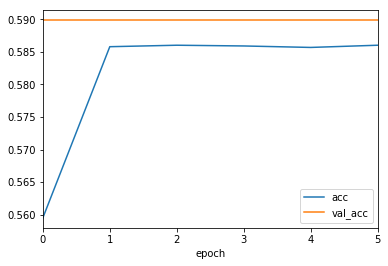

In [13]:
df = pd.read_csv('CNN.csv', index_col='epoch')
display(df[['acc', 'val_acc']].plot())